# Background and essentials

the package ```stopro```contains functions for generating realizations of a few generic stochastic processes, so far

1. The Wiener Process
2. The Ornstein-Uhlenbeck Process
3. The exponential Ornstein-Uhlenbeck Process

#### The Wiener process

A realization of a 1-d Wiener process $W(t)$ is the solution to the equation

$$ W(t)=\int_0^t dW(s)\approx \sum_{i=1}^N \Delta W(t_i)$$ with  $t_i=i\times\Delta t$ and random increments $\Delta W(t_i)$ that are drawn from a Gaussian distribution with zero mean $\left<\Delta W(t_i)\right>=0$ and variance $\left<\Delta W^2(t_i)\right>=\Delta t$.

The process is quite useful for modelling diffusion phenomena, random walks and solving stochastic differential equations of the form

$$d X=f(X)dt+g(X)dW$$

which is the difference equation

$$X(t+\Delta t)=X(t)+f(X(t))\Delta t+g(X(t))\Delta W(t)$$

in the limit $\Delta t \rightarrow 0$, so a dynamical system that have a deterministic component that advances a the state $X(t)$ by $f(X(t))\Delta$ and a noise component that changes the state by a random increment $g(X(t))\Delta W(t)$ that is normally distributed.


#### The Ornstein-Uhlenbeck process

The one-dimensional Ornstein-Uhlenbeck process is a simple variant of the stochastic differential equation above with a linear spring-like force and a constant noise magnitude:

$$d X=-\theta X dt+\sigma dW$$

The parameters $\theta$ and $\sigma$ are the force strength and the noise magnitude, respectively.

In the long time limit the OUP approaches a stationary distribution $p(x)$ for $X$ which is a Gaussian. When stationary, the process has a zero mean 

$$\left<\Delta X(t)\right>=0$$

and a variance of

$$v^2=\left<\Delta X^2(t)\right>=\sigma^2/2\theta$$.

The typical time constant of the process is given by the auto-correlation time. In equilibrium the auto correlation is

$$\left<\Delta X(t_0+t)X(t_0)\right>=\frac{\sigma^2}{2\theta} e^{-\theta t}$$,

so the time constant is $\tau=1/\theta$.

In a nutshell, the OUP wiggles around zero, with a **variability** $v=\sigma/\sqrt{2\theta}$ (standard deviation) and wobbles on a **timescale** of $\tau=1/\theta$.


#### The exponential Ornstein-Uhlenbeck process

This process is just the OUP plugged into an exponential function. So if $X(t)$ is the OUP (with $\theta=1$ and $\sigma=1$), then the exponential OUP $Z(t)$ is just:

$$Z(t)=Ae^{BX(t)}$$.

This means, $Z(t)>0$. The process ist stationary when $t\rightarrow \infty$, just like the OUP. This process has a positive mean $\mu$ and a coefficient of variation $c_V$, both of which are determined by the parameters $A$ and $B$.

# How to use the package

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import stopro as p


## The Wiener Process

####  Single realization of a one-dimensional Wiener process $W(t)$


Let's start simple. The function ```wiener``` takes two arguments, the time $T$ and the time increment $dt$ like so 

```
wiener(T,dt)
```

The initial condition is $W(0)=0$.

In [2]:
T = 1
dt = 0.001
p.wiener(T,dt)

{'X': array([[[0.        , 0.02161178, 0.01156251, ..., 0.61037309,
          0.62981011, 0.61284036]]]),
 't': array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ]),
 'dt': 0.001,
 'steps': 1000,
 'covariance': array([[1.]])}

The function returns a dictionary with a number of elements

1. ```t```: the array of time points
2. ```dt```: the time increment
3. ```steps```: the number of steps (T/dt)
4. ```X```: a dictionary of realizations
4. ```covariance```: the covariance matrix (matters later for multivariate processes)

Let's do it again an plot it.

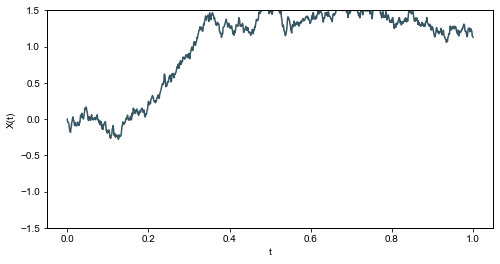

In [3]:
T = 1
dt = 0.001
res = p.wiener(T,dt)

fig,ax = plt.subplots(figsize=[8,4]);
ax.plot(res["t"],np.squeeze(res["X"][0]))
plt.xlabel("t")
plt.ylabel("X(t)")
plt.ylim([-1.5,1.5])
plt.show()

#### more samples...

... can be created with the keyword ```samples```. In the example below 5 realizations of the process are generated. In the returned result `res` the realization are stored in `res["X"]`, so that realization $i$ is `res["X"][i]`.

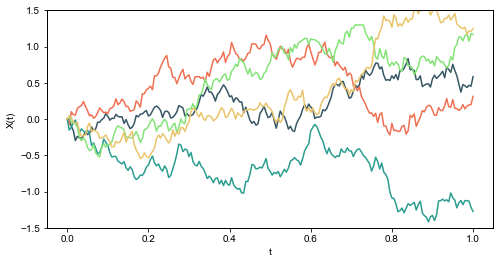

In [4]:
T = 1
dt = 0.005
samples = 5
res = p.wiener(1,0.005,samples=samples)

fig,ax = plt.subplots(figsize=[8,4])
for i in range(len(res["X"])):
    ax.plot(res["t"],np.squeeze(res["X"][i]))
    
plt.xlabel("t")
plt.ylabel("X(t)")
plt.ylim([-1.5,1.5])
plt.show()

### Multi-variate Wiener processes

You can generate multi-dimensional Wiener processes, so like

$$\mathbf{W}(t)=[W_1(t),W_2(t),...,W_N(t)]$$

where $N$ is the number of dimensions. So for instance you can make a two-dimensional random walk like so:

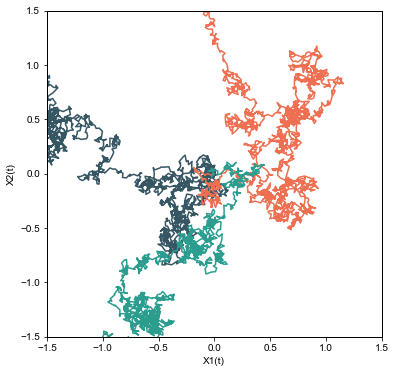

In [5]:
T = 1
dt = 0.0005
res=p.wiener(T,dt,dimension=2,samples=3)

fig,ax = plt.subplots(figsize=[6,6])
for i in range(len(res["X"])):
    ax.plot(res["X"][i][0],res["X"][i][1])
    
plt.xlabel("X1(t)")
plt.ylabel("X2(t)")
plt.ylim([-1.5,1.5])
plt.xlim([-1.5,1.5])
plt.show()

## Covariance for multivariate processes

### Specifying the covariance matrix $\mathbf S$.

Multivariate becomes interesting when the Wiener increments $dW_i$ have a non-trivial correlation, typically quantified by the covariance matrix.

$$S_{ij}dt=\left< dW_i dW_j \right>$$

The matrix $\mathbf S$ is positive definite.

Here's an example

$$ S =\left(\begin{array}{ccc}
1 & 0 & 1/\sqrt{2}\\
0 & 1 & 1/\sqrt{2}\\
1/\sqrt{2} & 1/\sqrt{2} & 1
\end{array}\right) $$.

Here dimensions $1$ and $2$ are uncorrelated, and $3$ covaries with both, $1$ and $2$.

Here are 4 realizations of 3-dimensional processes, that exhibit this covariance:

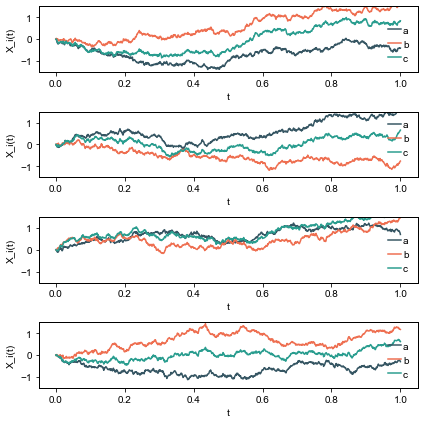

In [6]:
T = 1
dt = 0.001
a = 1.0/np.sqrt(2)
cov = [[1,0,a],[0,1,a],[a,a,1]]
samples = 4

res=p.wiener(T,dt,covariance=cov,samples=samples)

t = res["t"]
(D,steps)=np.shape(res["X"][0])
fig,ax = plt.subplots(samples,1,figsize=[6,6])
for j in range(samples):
    X = res["X"][j]
    for i in range(D):
        ax[j].plot(t,X[i])
        ax[j].set_xlabel("t")
        ax[j].set_ylabel("X_i(t)")
        ax[j].set_ylim([-1.5,1.5])
        ax[j].legend(["a","b","c"])
plt.tight_layout()
plt.show()

In the plots above, component $c$ is correlated with both $a$ and $b$, but $a$ and $b$ are stochastically independent.

### Specifying the Mixing Matrix

Another way of generating covariance processes, is by linear superposition. Let's say you have $M$ uncorrelated processes $W_i(t)$ where $i=1,...,M$ and you construct new processes by

$$dX_n = \sum _i A_n^i dW_i$$.

where $n=1,...,N$ so that the **mixing matrix** $\mathbf{A}$ is an $N\times M$ matrix. The process $X_n(t)$ is a multivariate Wiener process with covariance matrix 

$$\mathbf{S}=\mathbf{A}\mathbf{A}^T$$.

So for example let's start with two independent processes $W_1(t)$ and $W_2(t)$ to generate a 4-dimensional covariant Wiener process with components

$$ dX_n(t)=\cos(\alpha_n)dW_1(t)+\sin(\alpha_n)dW_2(t) $$

with 

1. $\alpha_1=0$
2. $\alpha_2=\pi/2$
3. $\alpha_3=\pi/6$
4. $\alpha_3=\pi$

That means, $1$ and $2$ are uncorrelated, $3$ ist strongly correlated with $1$ and $4$ is uncorrelated with $2$ and anti-correlated with $1$.

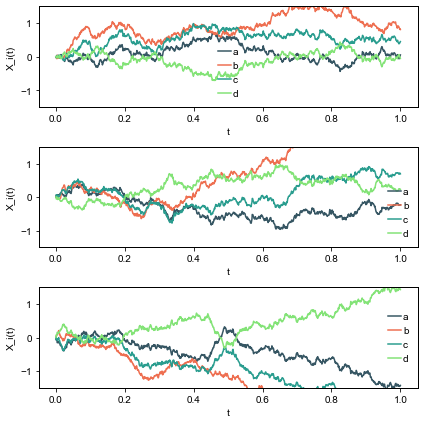

In [7]:
T = 1
dt = 0.001
samples = 3

A=np.array([[np.cos(x),np.sin(x)] for x in [0,np.pi/2,np.pi/6,np.pi]]);

res=p.wiener(T,dt,mixing_matrix=A,samples=samples)

t = res["t"]
(D,steps)=np.shape(res["X"][0])
fig,ax = plt.subplots(samples,1,figsize=[6,6])
for j in range(samples):
    X = res["X"][j]
    for i in range(D):
        ax[j].plot(t,X[i])
        ax[j].set_xlabel("t")
        ax[j].set_ylabel("X_i(t)")
        ax[j].set_ylim([-1.5,1.5])
        ax[j].legend(["a","b","c","d"])
plt.tight_layout()
plt.show()

## The Ornstein-Uhlenbeck process

A simple one-dimensional realization of the Ornstein Uhlenbeck process is generated with the command:

`p.ornsteinuhlenbeck(T,dt)`

by default, the timescale $\tau=1/\theta$ and variability $v=\sigma/\sqrt(2\theta)$ are set to unity. Because of this the traditional parameters of the OUP as defined by

$$d X=-\theta X dt+\sigma dW$$

are $\theta=1$ and $\sigma=\sqrt{2}$.

The function `ornsteinuhlenbeck()` takes all the keywords like `covariance`, `mixing_matrix`,`dimension`,`step`, etc. that the `wiener()` takes. 

In addition you can set the timescale and variablity using the `timescale` and `variability` keywords.

Let's start with a few realizations of a one-dimensional OUP:

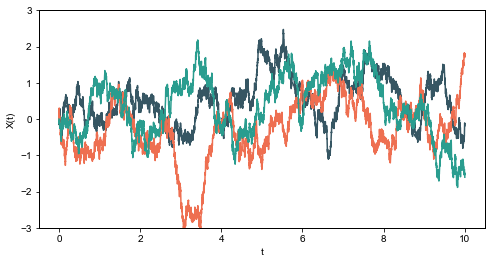

In [8]:
T = 10
dt = 0.001
samples = 3
res=p.ornsteinuhlenbeck(T,dt,samples=samples)

fig,ax = plt.subplots(figsize=[8,4])
for i in range(len(res["X"])):
    ax.plot(res["t"],np.squeeze(res["X"][i]))
    
plt.xlabel("t")
plt.ylabel("X(t)")
plt.ylim([-3,3])
plt.show()

### stationary OUPS

By default, all realization start at $X(0)=0$, which means that stochastically the process isn't equilibrated. If you want to generate realization from in equilibrium, the initial value must be chose from the equilibrium distribution, which is a Gaussian with zero mean and variance of $\sigma^2/2\theta$.

You can do that by setting the keyword `stationary` to `True`:


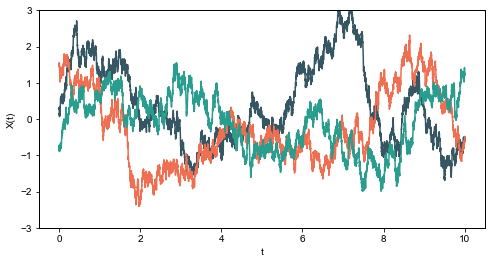

In [9]:
T = 10
dt = 0.001
samples = 3
res=p.ornsteinuhlenbeck(T,dt,samples=samples,stationary=True)

fig,ax = plt.subplots(figsize=[8,4])
for i in range(len(res["X"])):
    ax.plot(res["t"],np.squeeze(res["X"][i]))
    
plt.xlabel("t")
plt.ylabel("X(t)")
plt.ylim([-3,3])
plt.show()

### OUPs with different timescales and variability

Here are some examples for 4 different OUPS with different values for timescale and variability:

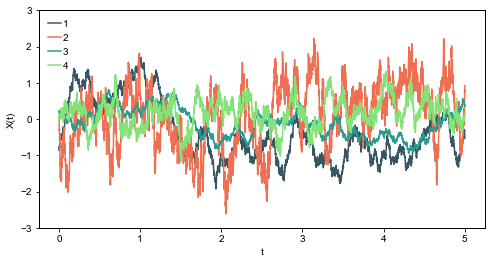

In [10]:
T = 5
dt = 0.001
oup1=p.ornsteinuhlenbeck(T,dt,timescale=1,variability=1,stationary=True)
oup2=p.ornsteinuhlenbeck(T,dt,timescale=.1,variability=1,stationary=True)
oup3=p.ornsteinuhlenbeck(T,dt,timescale=1,variability=0.5,stationary=True)
oup4=p.ornsteinuhlenbeck(T,dt,timescale=.1,variability=0.5,stationary=True)

fig,ax = plt.subplots(figsize=[8,4])
ax.plot(oup1["t"],np.squeeze(oup1["X"][0]))
ax.plot(oup2["t"],np.squeeze(oup2["X"][0]))
ax.plot(oup3["t"],np.squeeze(oup3["X"][0]))
ax.plot(oup4["t"],np.squeeze(oup4["X"][0]))
plt.legend(["1","2","3","4"])
plt.xlabel("t")
plt.ylabel("X(t)")
plt.ylim([-3,3])
plt.show()

 instead of timescale and variability, you can also specify the traditional parameters $\theta$ and $\sigma$, instead, in which case the timescale and variability are overwritten. For example this right here is equivalent to `timescale=1` and `variability=1`:

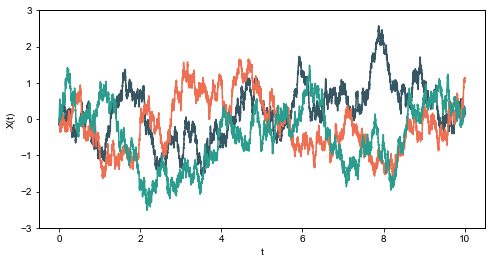

In [11]:
T = 10
dt = 0.001
samples = 3
res=p.ornsteinuhlenbeck(T,dt,samples=samples,theta=1,sigma=np.sqrt(2))

fig,ax = plt.subplots(figsize=[8,4])
for i in range(len(res["X"])):
    ax.plot(res["t"],np.squeeze(res["X"][i]))
    
plt.xlabel("t")
plt.ylabel("X(t)")
plt.ylim([-3,3])
plt.show()

### Multivariate Ornstein-Uhlenbeck Process

Just like with the Wiener process, we can generate multivariate OUPs with different covariant properties. By default, the covariance of the underlying Wiener process is the noise term of the differential equation that defines the OUP is just the identity matrix, so the components of the process are uncorrelated.

This here generates a few samples of a three dimensional OUP in equilibrium:

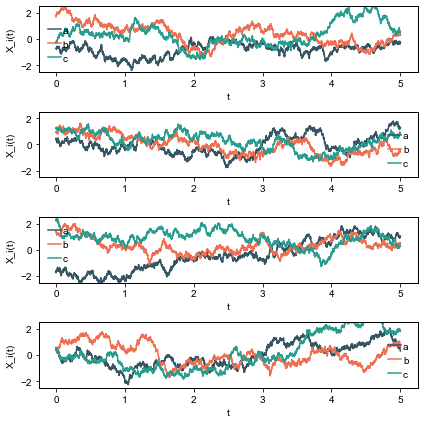

In [12]:
T = 5
dt = 0.001
samples = 4

res=p.ornsteinuhlenbeck(T,dt,dimension=3,
                        samples=samples,stationary=True)

t = res["t"]
(D,steps)=np.shape(res["X"][0])
fig,ax = plt.subplots(samples,1,figsize=[6,6])
for j in range(samples):
    X = res["X"][j]
    for i in range(D):
        ax[j].plot(t,X[i])
        ax[j].set_xlabel("t")
        ax[j].set_ylabel("X_i(t)")
        ax[j].set_ylim([-2.5,2.5])
        ax[j].legend(["a","b","c"])
plt.tight_layout()
plt.show()

### Covariance

We can also generate non-trivially covariant OUPs, like we did in the case of the Wiener process by either specifying a covariance matrix $\mathbf{S}$ directly, or a mixing matrix $\mathbf{A}$.

**Note that these matrices specify the covariance of the Wiener increments in the noise term, not the OUP directly.**

In the dictionary the function returns, the noise covariance is returned, you can access it with the key `noise_covariance`.

Let's do the example we described above for the Wiener processes, where we took two independent Wiener increments, let's call them $dU_1$ and $dU_2$ as as basis and used a mixing structure like this:

$$ dW_n(t)=\cos(\alpha_n)dU_1(t)+\sin(\alpha_n)dU_2(t) $$

with 

1. $\alpha_1=0$
2. $\alpha_2=\pi/2$
3. $\alpha_3=\pi/6$
4. $\alpha_3=\pi$

for the Wiener increments in the 4 dimensional OUP:

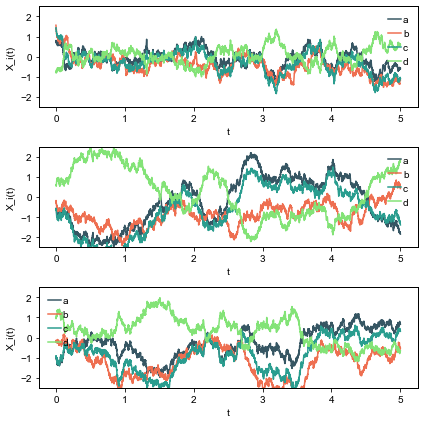

In [13]:
T = 5
dt = 0.001
samples = 3

A=np.array([[np.cos(x),np.sin(x)] for x in [0,np.pi/2,np.pi/6,np.pi]]);

res=p.ornsteinuhlenbeck(T,dt,mixing_matrix=A,samples=samples,stationary=True)

t = res["t"]
(D,steps)=np.shape(res["X"][0])
fig,ax = plt.subplots(samples,1,figsize=[6,6])
for j in range(samples):
    X = res["X"][j]
    for i in range(D):
        ax[j].plot(t,X[i])
        ax[j].set_xlabel("t")
        ax[j].set_ylabel("X_i(t)")
        ax[j].set_ylim([-2.5,2.5])
        ax[j].legend(["a","b","c","d"])
plt.tight_layout()
plt.show()

## The exponential Ornstein-Uhlenbeck Process

the function `exponential_ornsteinuhlenbeck()` works exactly, like the `ornsteinuhlenbeck()` function, with the same kind of keywords, `covariance`, `dimension`, `stationary`, etc.

The only difference is that you specify the mean of the process, and the coefficient of variation. 

You can still set the `timescale` independently.

Her's an example, similar to the OUP example above. A 3-dimensional eOUP with a covariance generated by the mixing of two independent underlying noise terms, that generates a covariance matrix

$$ S =\left(\begin{array}{ccc}
1 & 0 & 1/\sqrt{2}\\
0 & 1 & 1/\sqrt{2}\\
1/\sqrt{2} & 1/\sqrt{2} & 1
\end{array}\right) $$.


a timescale of $\tau=0.25$ a coefficient of variation $c_V=0.75$ and a mean $\mu=0.5$.

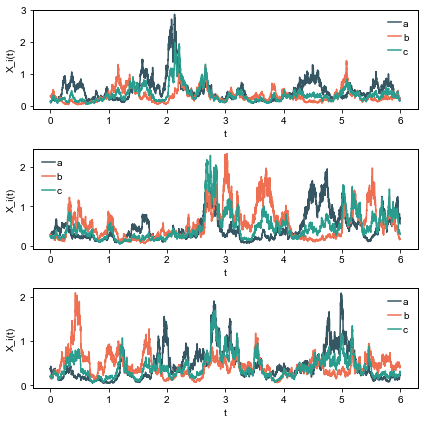

In [14]:
T = 6
dt = 0.001
samples = 3
tau = 0.25
cv = 0.75
mu = 0.5

A=np.array([[np.cos(x),np.sin(x)] for x in [0,np.pi/2,np.pi/4]]);

res=p.exponential_ornsteinuhlenbeck(T,dt,mixing_matrix=A,samples=samples,
                        stationary=True,
                        timescale=tau,
                        coeff_var=cv,
                        mean=mu)

t = res["t"]
(D,steps)=np.shape(res["X"][0])
fig,ax = plt.subplots(samples,1,figsize=[6,6])
for j in range(samples):
    X = res["X"][j]
    for i in range(D):
        ax[j].plot(t,X[i])
        ax[j].set_xlabel("t")
        ax[j].set_ylabel("X_i(t)")
        #ax[j].set_ylim([0,5])
        ax[j].legend(["a","b","c","d"])
plt.tight_layout()
plt.show()